1. Download the dataset: Dataset
2. Load the dataset into the tool.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import warnings

In [2]:
data=pd.read_csv("Mall_Customers.csv",encoding='ISO-8859-1')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi- Variate Analysis
∙ Multi-Variate Analysis

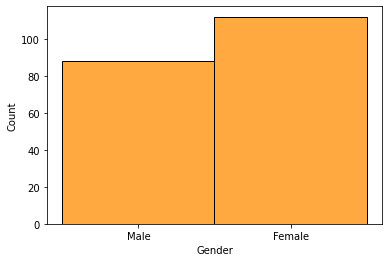

In [5]:
#univariate analysis "Histogram"
sns.histplot(data["Gender"],color='darkorange')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


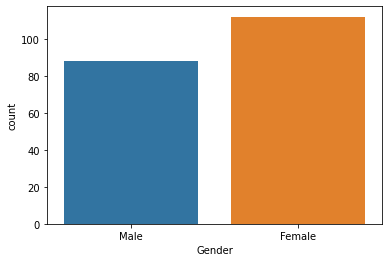

In [6]:
#univariate analysis "Countlot"
sns.countplot(data['Gender'])

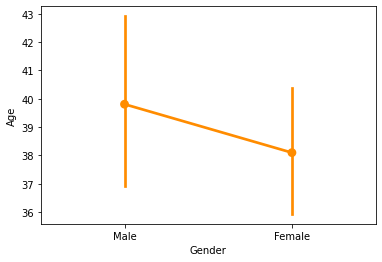

In [7]:
#bivariate analysis"Pointplot"
sns.pointplot(x='Gender',y='Age',data=data,color='darkorange')

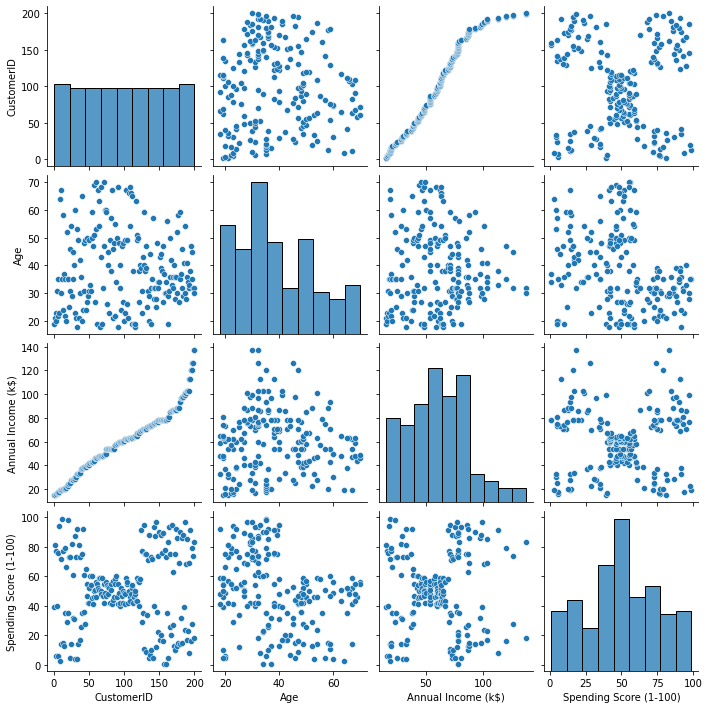

In [8]:
#Multivariate analysis"Pairplot"
sns.pairplot(data)

4. Perform descriptive statistics on the dataset.

In [9]:
# Descriptive statistics of the data set accessed.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
data.isnull().any().any()

False

In [11]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
df2=data.dropna(how='all')

5. Check for Missing values and deal with them.

In [ ]:
df2.isnull().sum().sum()

This dataset does not contain any missing value.

In [13]:
missing_values=data.isnull().sum()
missing_values[missing_values>0]/len(data)*100

Series([], dtype: float64)

6.Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


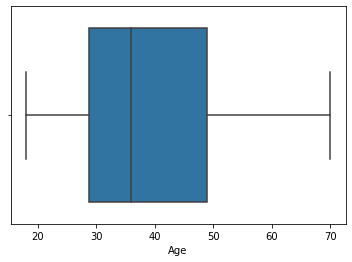

In [14]:
sns.boxplot(data['Age'],data=data)

In [15]:
for x in ['Age']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

7. Check for Categorical columns and perform encoding.

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15,39
1,2,1,21.0,15,81
2,3,0,20.0,16,6
3,4,0,23.0,16,77
4,5,0,31.0,17,40


8. Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler()
data1=df.fit_transform(data)

In [20]:
data1

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

9. Perform any of the clustering algorithms 10. Add the cluster data with the primary dataset

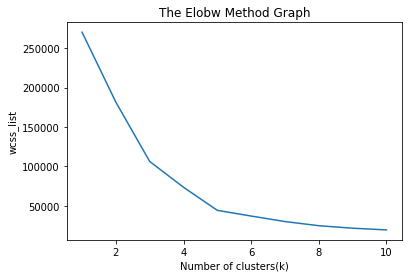

In [21]:
x = data.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans  
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

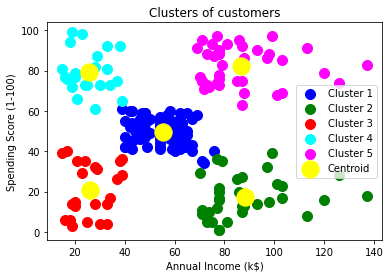

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

11. Split the data into dependent and independent
variables

In [24]:
#target variable
y=data['Age']
y.head()

0    19.0
1    21.0
2    20.0
3    23.0
4    31.0
Name: Age, dtype: float64

In [25]:
#independent
x=data.drop(columns=['Age'],axis=1)
x.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40


In [26]:
data=pd.get_dummies(data,columns=['Age'])
data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18.0,Age_19.0,Age_20.0,Age_21.0,Age_22.0,Age_23.0,...,Age_59.0,Age_60.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_67.0,Age_68.0,Age_69.0,Age_70.0
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12. Split the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(160, 4)

In [28]:
x_test.shape

(40, 4)

In [29]:
y_train.shape

(160,)

In [30]:
y_test.shape

(40,)

13. Build the Model
14. Train the Model
15. Test the Model
16. Measure the performance using Evaluation Metrics.

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
x_train.shape

(160, 4)

In [33]:
x_test.shape

(40, 4)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
train_pred = model.predict(x_train)
train_pred

array([57., 35., 60., 32., 34., 35., 53., 32., 32., 32., 32., 32., 32.,
       32., 32., 53., 53., 36., 60., 35., 32., 32., 32., 21., 32., 32.,
       35., 39., 35., 32., 32., 32., 32., 32., 34., 32., 32., 53., 35.,
       29., 32., 35., 34., 32., 32., 35., 53., 20., 41., 32., 35., 53.,
       47., 35., 47., 34., 32., 32., 32., 32., 57., 32., 35., 35., 32.,
       32., 32., 35., 32., 35., 32., 20., 20., 32., 21., 39., 21., 32.,
       32., 20., 21., 32., 32., 35., 32., 32., 21., 32., 34., 45., 53.,
       35., 32., 32., 39., 32., 57., 32., 32., 21., 32., 32., 35., 35.,
       35., 21., 32., 52., 60., 32., 32., 32., 21., 53., 32., 35., 32.,
       59., 53., 60., 32., 32., 35., 34., 29., 34., 53., 32., 32., 32.,
       21., 32., 32., 32., 32., 34., 32., 32., 32., 21., 32., 32., 32.,
       34., 32., 35., 35., 57., 32., 35., 32., 53., 21., 21., 32., 32.,
       37., 32., 35., 34.])

In [37]:
test_pred= model.predict(x_test)
test_pred

array([53., 34., 32., 32., 28., 34., 21., 32., 53., 34., 35., 32., 32.,
       34., 32., 21., 21., 34., 35., 32., 32., 29., 35., 28., 35., 29.,
       32., 32., 32., 53., 35., 20., 34., 32., 53., 32., 32., 35., 32.,
       32.])

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [40]:
accuracy_score(y_test,test_pred)

0.025

In [39]:
accuracy_score(y_train,train_pred)

0.1

In [41]:
confusion_matrix(y_test,test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
pd.crosstab(y_test,test_pred)

col_0,20.0,21.0,28.0,29.0,32.0,34.0,35.0,53.0
Age,,,,,,,,
18.0,0,1,0,0,0,0,0,0
19.0,0,0,0,0,1,0,1,0
22.0,0,1,0,0,0,0,0,0
23.0,0,1,0,0,0,0,0,0
24.0,0,0,0,0,0,0,1,0
27.0,0,0,1,0,0,0,0,0
28.0,0,0,0,1,0,0,0,0
29.0,0,0,0,0,1,0,0,0
30.0,0,0,1,0,1,0,1,0


In [43]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

        18.0       0.00      0.00      0.00         1
        19.0       0.00      0.00      0.00         2
        20.0       0.00      0.00      0.00         0
        21.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         1
        27.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         3
        31.0       0.00      0.00      0.00         2
        32.0       0.00      0.00      0.00         0
        34.0       0.00      0.00      0.00         0
        35.0       0.17      0.50      0.25         2
        36.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        38.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1